# DeepQ Expert Agent
A traditional DeepQ algorithm is modified to explore from time to time the action space suggested by an expert (ExpertOp4grid Package).

In [22]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from matplotlib import pyplot as plt
import grid2op
from grid2op.Runner import Runner
from grid2op.Reward import L2RPNSandBoxScore, L2RPNReward

from ExpertAgent.DeepQExpert import DeepQExpert
from ExpertAgent.utils import get_package_root
from ExpertAgent.utils.helper_functions import plot_runner_results

In [2]:
env_name = "l2rpn_case14_sandbox"
env = grid2op.make(os.path.join(grid2op.get_current_local_dir(), env_name),
                   reward_class=L2RPNSandBoxScore,
                   other_rewards={
                       "reward": L2RPNReward
                   })

In [3]:
load_path = os.path.join(get_package_root(), "DeepQExpert", "l2rpn_case14_sandbox")
agent = DeepQExpert(action_space=env.action_space,
                    name="DeepQExpert",
                    store_action=True,
                    load_path=load_path,
                    observation_space=env.observation_space)

2026-02-10 18:02:38.427613: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
agent.deep_q._model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ state (InputLayer)              │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 800)            │       160,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 494)            │       395,694 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 494)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 494)            │       244,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 494)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 494)            │       244,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 494)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 179)            │        88,605 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,415,759 (9.22 MB)

 Trainable params: 2,415,759 (9.22 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
runner_params = env.get_params_for_runner()
runner_params["verbose"] = True

logs_path = os.path.join(get_package_root(), "DeepQExpert", "l2rpn_case14_sandbox", "logs_eval")
os.makedirs(logs_path, exist_ok=True)
num_episodes = 8
num_process = 1
max_iter = env.max_episode_duration()
np.random.seed(42)
env_seeds = np.random.randint(int(1e5), size=num_episodes)

# Build runner
runner = Runner(**runner_params,
                agentClass=None,
                agentInstance=agent)


In [ ]:
res = runner.run(path_save=logs_path,
                 nb_episode=num_episodes,
                 nb_process=num_process,
                 max_iter=max_iter,
                 env_seeds=env_seeds,
                 pbar=True)

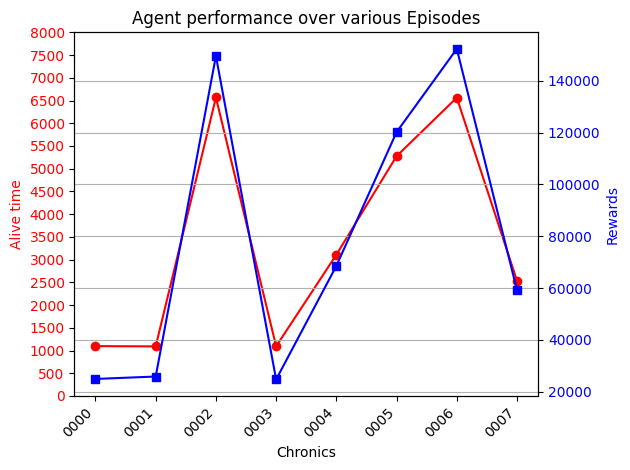

In [23]:
plot_runner_results(res, max_iter)